In [1]:
# setosa.io/ev/image-kernals/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
from tensorflow.keras.datasets import mnist

In [114]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [115]:
X_train.shape

(60000, 28, 28)

In [116]:
X_test.shape

(10000, 28, 28)

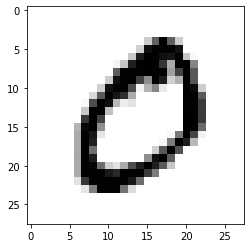

In [117]:
plt.imshow(X_train[1],cmap='binary')

In [118]:
y_train.shape

(60000,)

In [119]:
from tensorflow.keras.utils import to_categorical

In [120]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [127]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [128]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [123]:
## normalization 
X_train= (X_train/255).reshape(60000,28,28,1)
X_test= (X_test/255).reshape(10000,28,28,1)

In [124]:
X_train.shape

(60000, 28, 28, 1)

In [129]:
X_train.max()

1.0

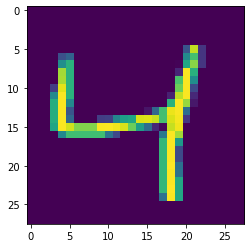

In [130]:
plt.imshow(X_train[2])

In [131]:
from tensorflow.keras.models import Sequential,
from tensorflow.keras.layers import Dense, MaxPool2D,Flatten,Conv2D

In [132]:
## Creating a model
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),padding= 'valid', activation="relu",input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

## output layer
model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 4608)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               589952    
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [134]:
from tensorflow.keras.callbacks import EarlyStopping

In [135]:
stopp=EarlyStopping(monitor="val_loss", patience=2)

In [136]:
model.fit(x=X_train,y=y_train_cat,validation_data=(X_test,y_test_cat), epochs=10, callbacks=stopp)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1410 - accuracy: 0.9580 - val_loss: 0.0593 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0404 - val_accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0467 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0459 -

In [137]:
los=pd.DataFrame(model.history.history)

<AxesSubplot:>

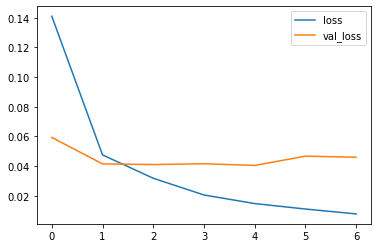

In [138]:
los[['loss','val_loss']].plot()

<AxesSubplot:>

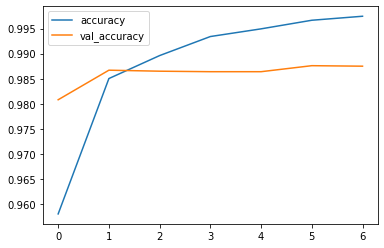

In [141]:
los[['accuracy','val_accuracy']].plot()

In [143]:
model.metrics_names

['loss', 'accuracy']

In [144]:
model.evaluate(X_test,y_test_cat, verbose=0)

[0.04594647139310837, 0.987500011920929]

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
prediction=model.predict(X_test)

In [173]:
prediction=np.round(prediction)

In [174]:
y_test_cat[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [175]:
prediction[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

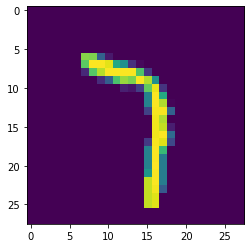

In [192]:
plt.imshow(X_test[122])

In [193]:
prediction[122]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)